<div class="alert alert-info alert-warning" style="background-color: white; color: black; text-align: center;">
    <h1><span style="color: red;">Ozan MÖHÜRCÜ</span></h1>
    <h1><span style="color: red;">Data Analyst | Data Scientist</span></h1>
    <div style="text-align: center; font-family: Arial, sans-serif; margin-top: 20px;">
        <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin: 0 10px;">
            <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
        </a>
        <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin: 0 10px;">
            <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
        </a>
        <a href="https://ozan-mohurcu.github.io/" style="text-decoration: none; color: #fff; margin: 0 10px;">
            <span style="background-color: #6A1B9A; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">Portfolio</span>
        </a>
    </div>
</div>

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
📥 Data Loading
</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import re

df = pd.read_csv("/kaggle/input/cars-datasets-2025/Cars Datasets 2025.csv", encoding="cp1252")
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [3]:
def clean_number(text):
    if pd.isna(text): 
        return None
    text = str(text).replace(",", "").replace("$", "").strip()
    nums = [float(x) for x in re.findall(r"\d+\.?\d*", text)]
    if not nums:
        return None
    return sum(nums)/len(nums)

num_cols = ["CC/Battery Capacity", "HorsePower", "Total Speed", "Performance(0 - 100 )KM/H", "Cars Prices", "Torque"]
for col in num_cols:
    df[col] = df[col].apply(clean_number)

df["Seats"] = pd.to_numeric(df["Seats"], errors="coerce").astype("Int64")

df["Company Names"] = df["Company Names"].str.strip().str.upper()
df["Cars Names"] = df["Cars Names"].str.strip().str.title()
df["Fuel Types"] = df["Fuel Types"].str.strip().str.lower()
df["Engines"] = df["Engines"].str.strip().str.upper()

df.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,Sf90 Stradale,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,Phantom,V12,6749.0,563.0,250.0,5.3,460000.0,petrol,5,900.0
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0
3,MERCEDES,Gt 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,petrol,4,900.0
4,AUDI,Audi R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,petrol,2,560.0
5,BMW,Mclaren 720S,V8,3994.0,710.0,341.0,2.9,499000.0,petrol,2,770.0
6,ASTON MARTIN,Vantage F1,V8,3982.0,656.0,314.0,3.6,193440.0,petrol,2,685.0
7,BENTLEY,Continental Gt Azure,V8,3996.0,550.0,318.0,4.0,311000.0,petrol,4,900.0
8,LAMBORGHINI,Veneno Roadster,V12,6498.0,750.0,356.0,2.9,4500000.0,petrol,2,690.0
9,FERRARI,F8 Tributo,V8,3900.0,710.0,340.0,2.9,280000.0,petrol,2,770.0


In [4]:
df.isnull().sum()

Company Names                 0
Cars Names                    0
Engines                       0
CC/Battery Capacity           5
HorsePower                    0
Total Speed                   0
Performance(0 - 100 )KM/H     6
Cars Prices                   1
Fuel Types                    0
Seats                        12
Torque                        1
dtype: int64

In [5]:
num_cols = ["CC/Battery Capacity", "Performance(0 - 100 )KM/H", "Cars Prices", "Torque", "Seats"]
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

cat_cols = ["Company Names", "Cars Names", "Engines", "Fuel Types"]
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64

In [6]:
cat_cols = ["Company Names", "Cars Names", "Engines", "Fuel Types"]
for col in cat_cols:
    df[col] = df[col].astype('category')

In [7]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,Sf90 Stradale,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,Phantom,V12,6749.0,563.0,250.0,5.3,460000.0,petrol,5,900.0
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0
3,MERCEDES,Gt 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,petrol,4,900.0
4,AUDI,Audi R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,petrol,2,560.0


<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
📊 Data Visualization
</h2>

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🚗 1 - AUDİ
</h2>

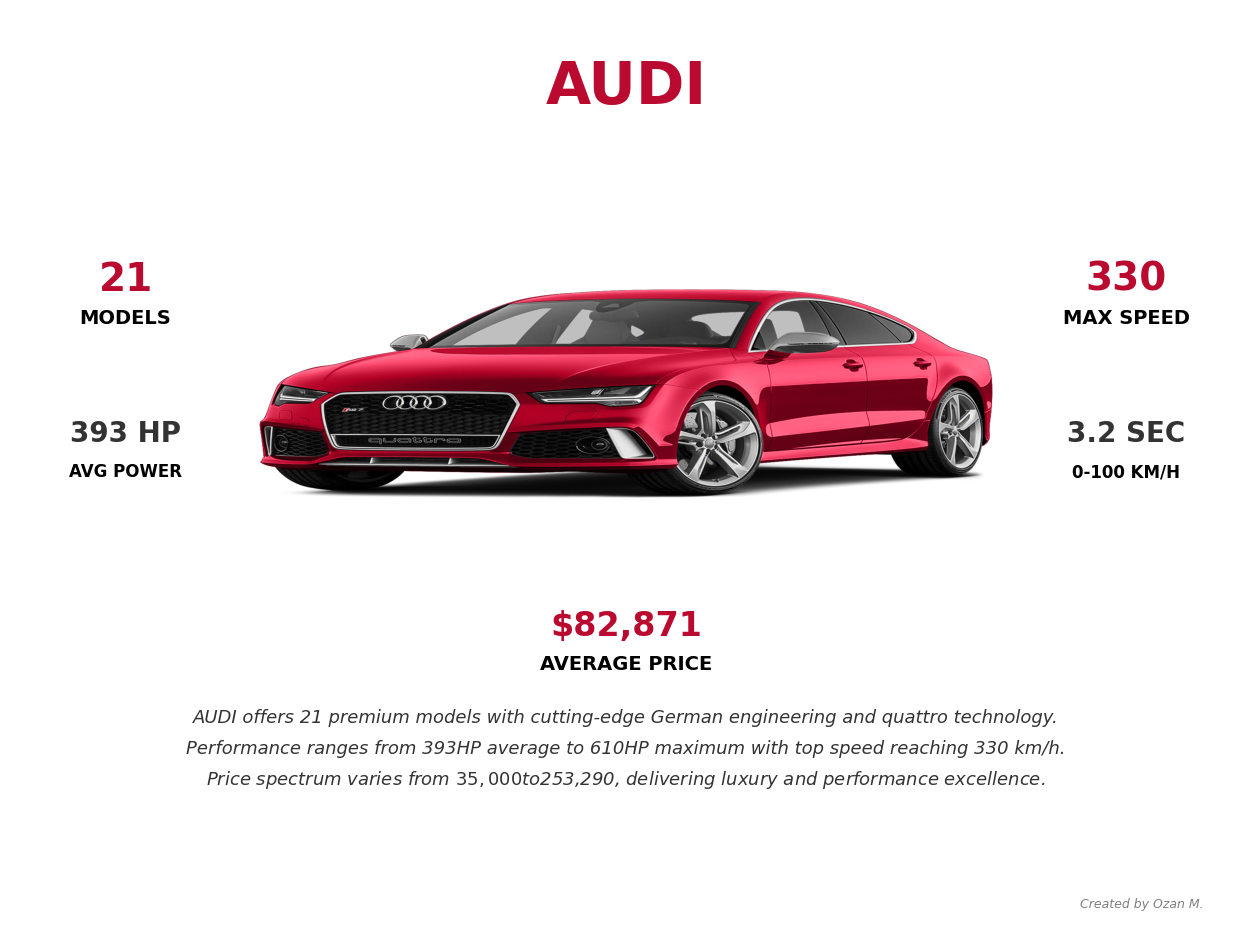

In [8]:
def get_audi_data(df):
    audi_data = df[df['Company Names'] == 'AUDI']
    
    stats = {
        'total_models': len(audi_data),
        'avg_power': audi_data['HorsePower'].mean(),
        'max_power': audi_data['HorsePower'].max(),
        'avg_price': audi_data['Cars Prices'].mean(),
        'max_speed': audi_data['Total Speed'].max(),
        'best_acceleration': audi_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': audi_data['CC/Battery Capacity'].mean(),
        'min_price': audi_data['Cars Prices'].min(),
        'max_price': audi_data['Cars Prices'].max()
    }
    
    return stats

def create_audi_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    audi_stats = get_audi_data(df)
    
    ax.text(8, 11, 'AUDI', ha='center', va='center', fontsize=42, fontweight='bold', color='#BB0A30')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/audi.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='lightgray', alpha=0.5))
        ax.text(8, 7, 'AUDI\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{audi_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#BB0A30')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{audi_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{audi_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#BB0A30')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{audi_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${audi_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#BB0A30')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"AUDI offers {audi_stats['total_models']} premium models with cutting-edge German engineering and quattro technology.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Performance ranges from {audi_stats['avg_power']:.0f}HP average to {audi_stats['max_power']:.0f}HP maximum with top speed reaching {audi_stats['max_speed']:.0f} km/h.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Price spectrum varies from ${audi_stats['min_price']:,.0f} to ${audi_stats['max_price']:,.0f}, delivering luxury and performance excellence.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('audi_enhanced_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_audi_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🚙 2 - BMW
</h2>

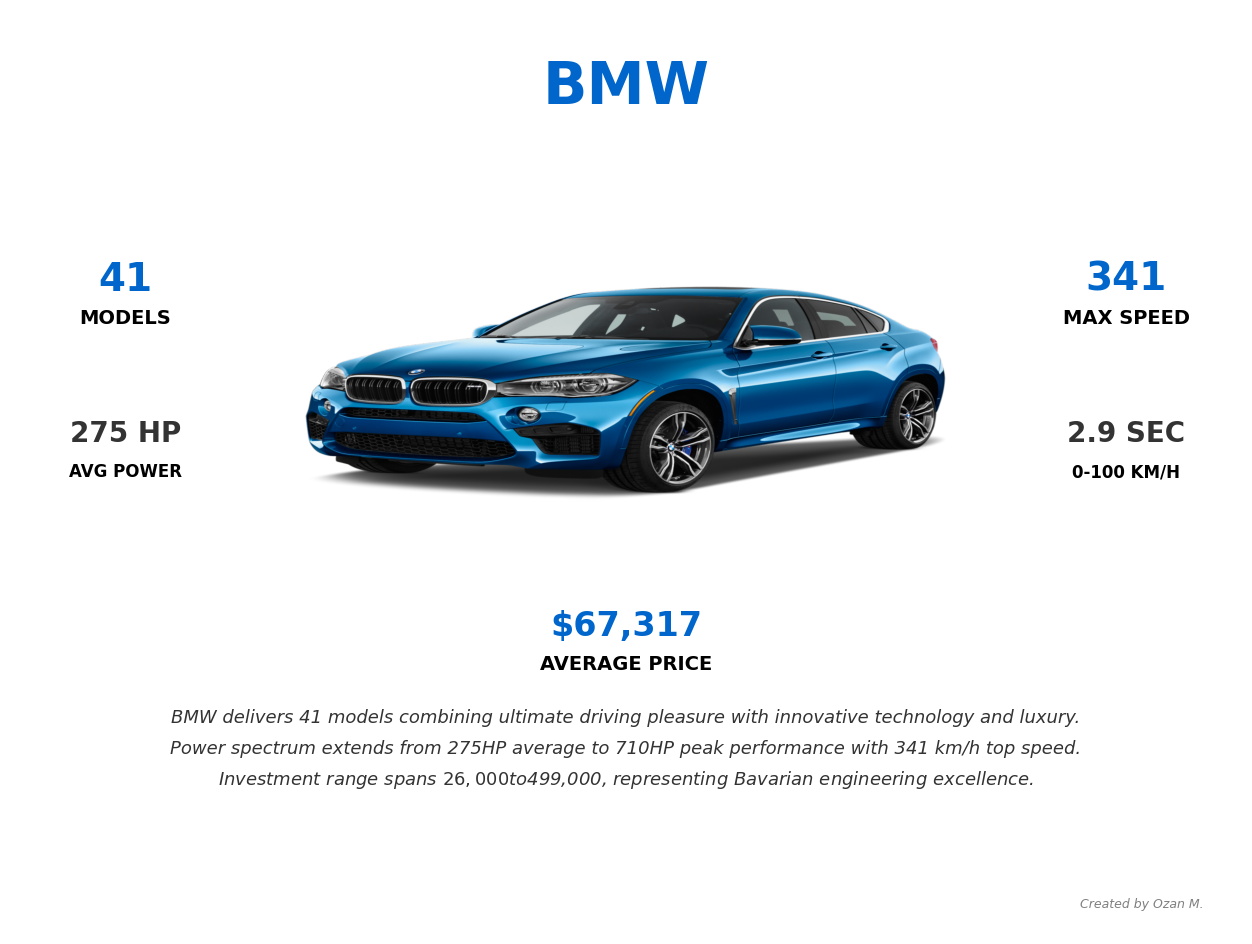

In [9]:
def get_bmw_data(df):
    bmw_data = df[df['Company Names'] == 'BMW']
    
    stats = {
        'total_models': len(bmw_data),
        'avg_power': bmw_data['HorsePower'].mean(),
        'max_power': bmw_data['HorsePower'].max(),
        'avg_price': bmw_data['Cars Prices'].mean(),
        'max_speed': bmw_data['Total Speed'].max(),
        'best_acceleration': bmw_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': bmw_data['CC/Battery Capacity'].mean(),
        'min_price': bmw_data['Cars Prices'].min(),
        'max_price': bmw_data['Cars Prices'].max()
    }
    
    return stats

def create_bmw_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    bmw_stats = get_bmw_data(df)
    
    ax.text(8, 11, 'BMW', ha='center', va='center', fontsize=42, fontweight='bold', color='#0066CC')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/bmw.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='lightblue', alpha=0.5))
        ax.text(8, 7, 'BMW\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{bmw_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#0066CC')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{bmw_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{bmw_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#0066CC')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{bmw_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${bmw_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#0066CC')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"BMW delivers {bmw_stats['total_models']} models combining ultimate driving pleasure with innovative technology and luxury.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Power spectrum extends from {bmw_stats['avg_power']:.0f}HP average to {bmw_stats['max_power']:.0f}HP peak performance with {bmw_stats['max_speed']:.0f} km/h top speed.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Investment range spans ${bmw_stats['min_price']:,.0f} to ${bmw_stats['max_price']:,.0f}, representing Bavarian engineering excellence.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('bmw_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_bmw_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🏎️ 3 - FERRARI
</h2>

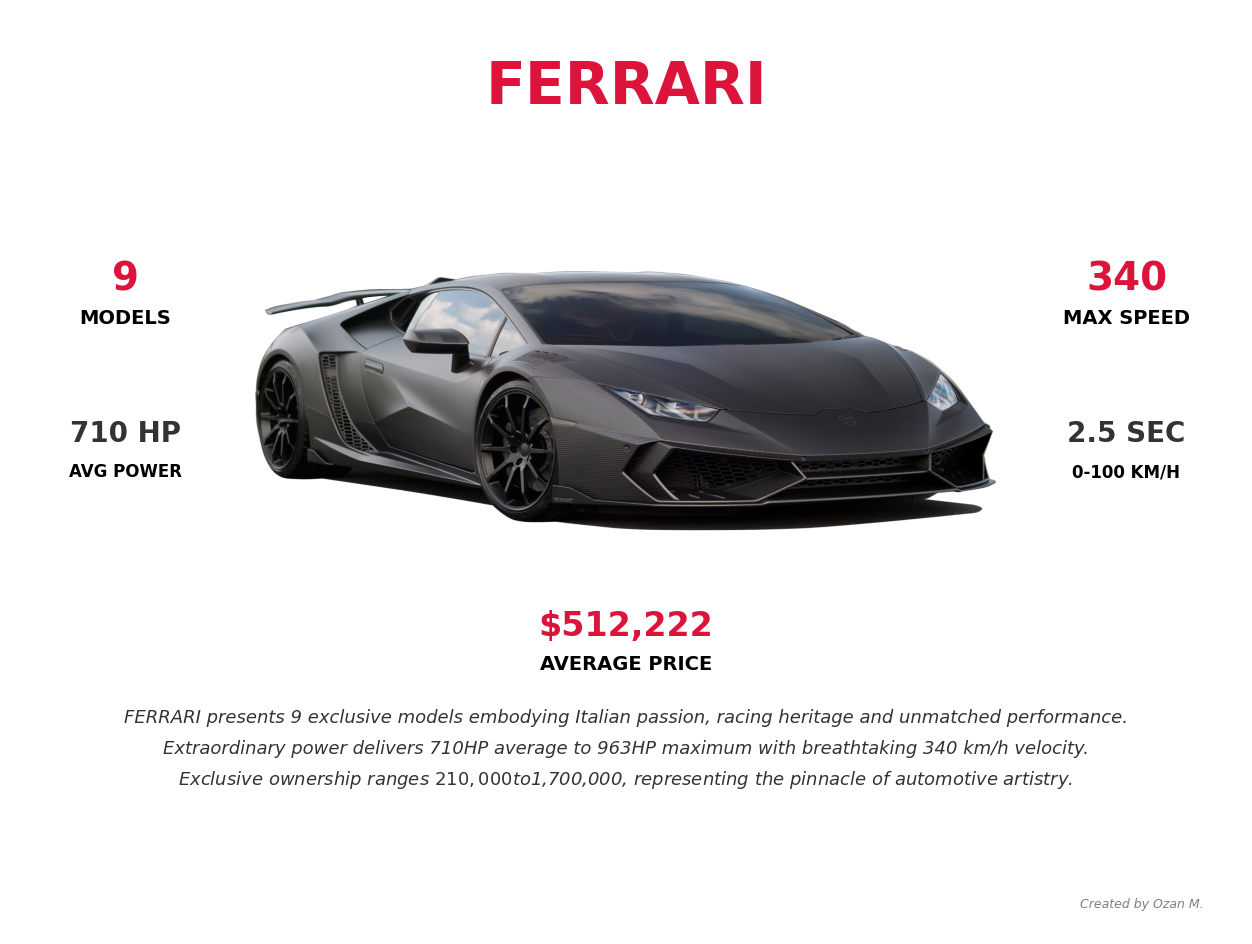

In [10]:
def get_ferrari_data(df):
    ferrari_data = df[df['Company Names'] == 'FERRARI']
    
    stats = {
        'total_models': len(ferrari_data),
        'avg_power': ferrari_data['HorsePower'].mean(),
        'max_power': ferrari_data['HorsePower'].max(),
        'avg_price': ferrari_data['Cars Prices'].mean(),
        'max_speed': ferrari_data['Total Speed'].max(),
        'best_acceleration': ferrari_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': ferrari_data['CC/Battery Capacity'].mean(),
        'min_price': ferrari_data['Cars Prices'].min(),
        'max_price': ferrari_data['Cars Prices'].max()
    }
    
    return stats

def create_ferrari_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    ferrari_stats = get_ferrari_data(df)
    
    ax.text(8, 11, 'FERRARI', ha='center', va='center', fontsize=42, fontweight='bold', color='#DC143C')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/ferrari.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='lightcoral', alpha=0.5))
        ax.text(8, 7, 'FERRARI\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{ferrari_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#DC143C')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{ferrari_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{ferrari_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#DC143C')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{ferrari_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${ferrari_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#DC143C')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"FERRARI presents {ferrari_stats['total_models']} exclusive models embodying Italian passion, racing heritage and unmatched performance.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Extraordinary power delivers {ferrari_stats['avg_power']:.0f}HP average to {ferrari_stats['max_power']:.0f}HP maximum with breathtaking {ferrari_stats['max_speed']:.0f} km/h velocity.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Exclusive ownership ranges ${ferrari_stats['min_price']:,.0f} to ${ferrari_stats['max_price']:,.0f}, representing the pinnacle of automotive artistry.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('ferrari_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_ferrari_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🚘 4 - MERCEDES
</h2>

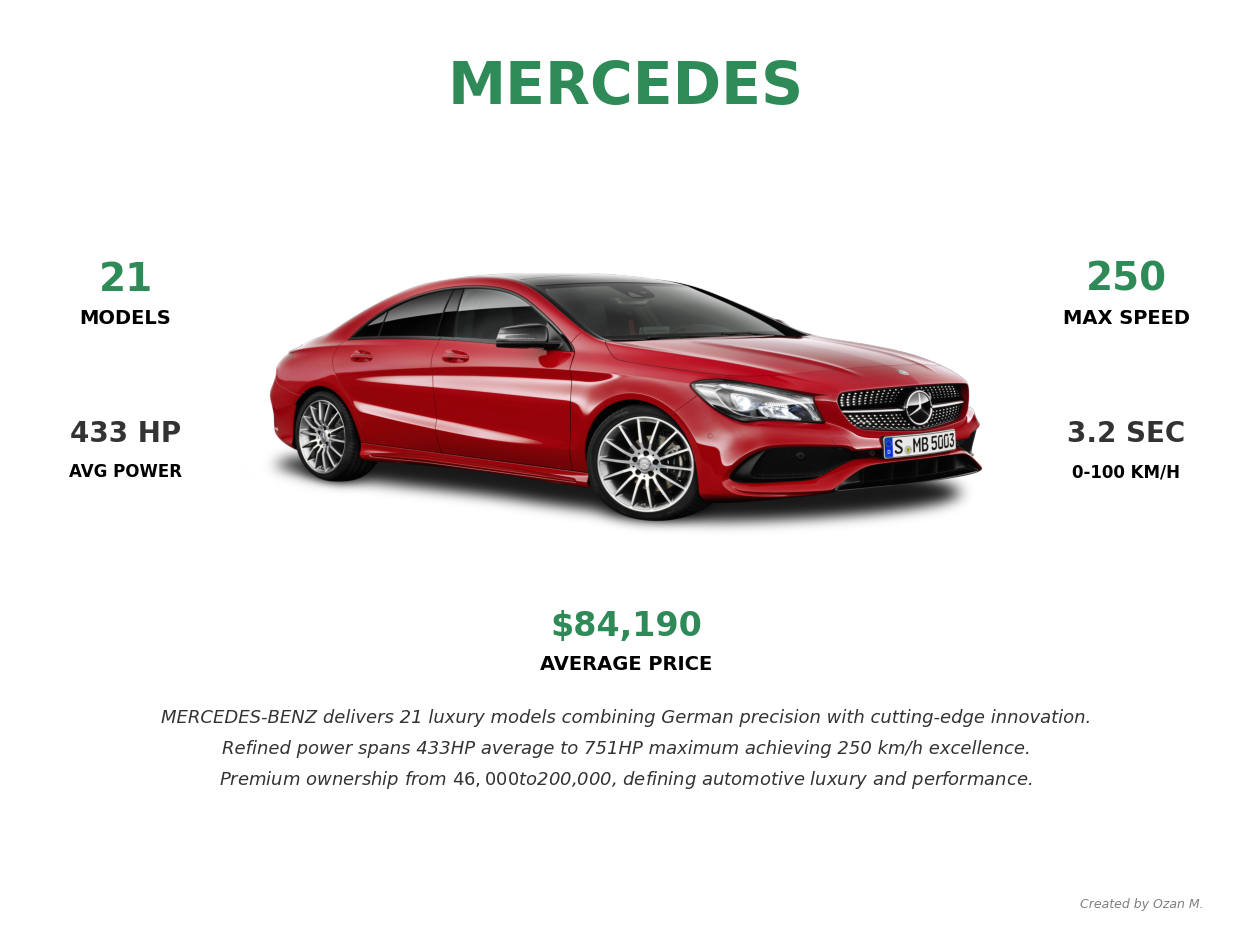

In [11]:
def get_mercedes_data(df):
    mercedes_data = df[df['Company Names'] == 'MERCEDES']
    
    stats = {
        'total_models': len(mercedes_data),
        'avg_power': mercedes_data['HorsePower'].mean(),
        'max_power': mercedes_data['HorsePower'].max(),
        'avg_price': mercedes_data['Cars Prices'].mean(),
        'max_speed': mercedes_data['Total Speed'].max(),
        'best_acceleration': mercedes_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': mercedes_data['CC/Battery Capacity'].mean(),
        'min_price': mercedes_data['Cars Prices'].min(),
        'max_price': mercedes_data['Cars Prices'].max()
    }
    
    return stats

def create_mercedes_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    mercedes_stats = get_mercedes_data(df)
    
    ax.text(8, 11, 'MERCEDES', ha='center', va='center', fontsize=42, fontweight='bold', color='#2E8B57')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/mercedes.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='lightgreen', alpha=0.5))
        ax.text(8, 7, 'MERCEDES\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{mercedes_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#2E8B57')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{mercedes_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{mercedes_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#2E8B57')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{mercedes_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${mercedes_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#2E8B57')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"MERCEDES-BENZ delivers {mercedes_stats['total_models']} luxury models combining German precision with cutting-edge innovation.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Refined power spans {mercedes_stats['avg_power']:.0f}HP average to {mercedes_stats['max_power']:.0f}HP maximum achieving {mercedes_stats['max_speed']:.0f} km/h excellence.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Premium ownership from ${mercedes_stats['min_price']:,.0f} to ${mercedes_stats['max_price']:,.0f}, defining automotive luxury and performance.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('mercedes_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_mercedes_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🏎️ 5 - LAMBORGHINI
</h2>

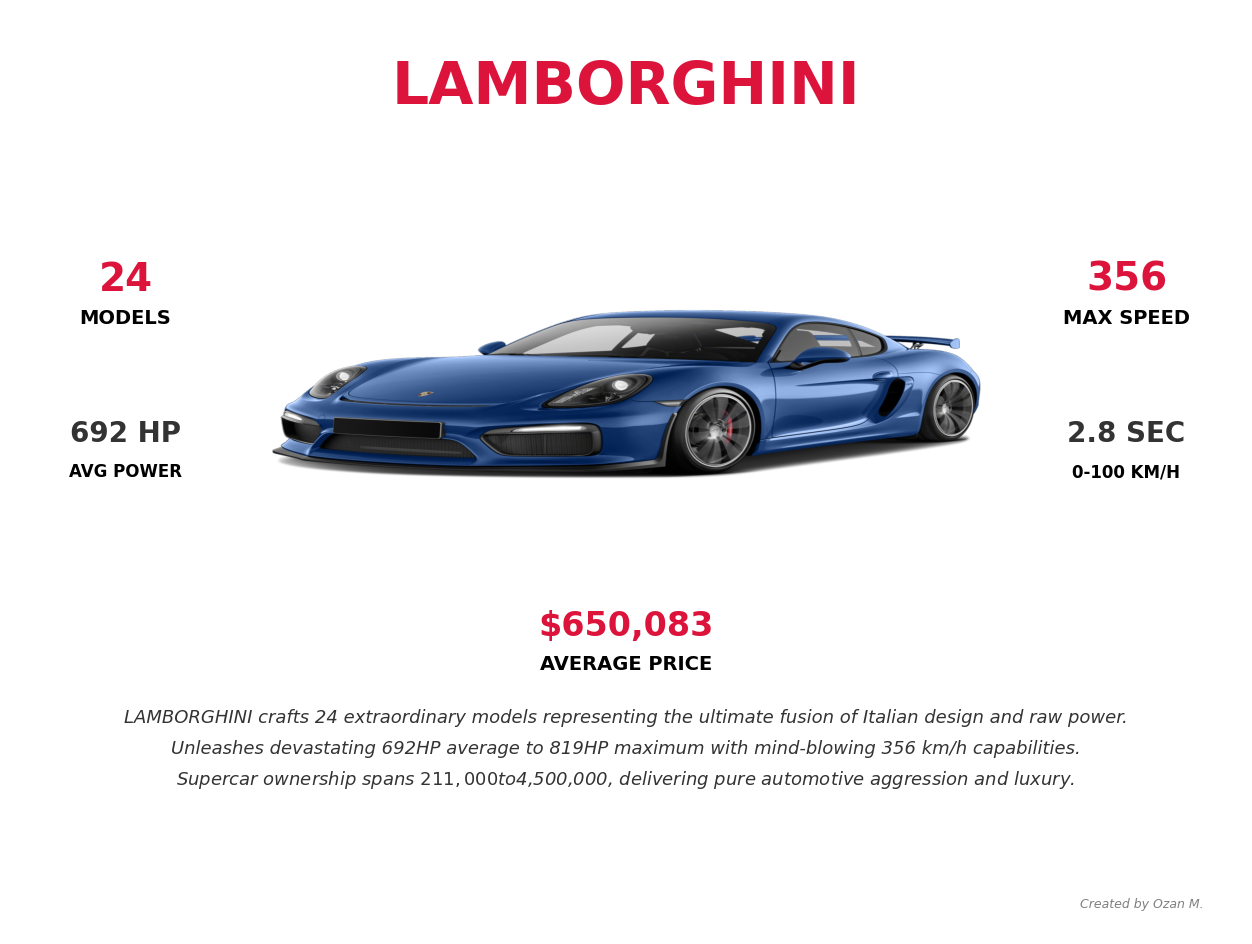

In [12]:
def get_lamborghini_data(df):
    lambo_data = df[df['Company Names'] == 'LAMBORGHINI']
    
    stats = {
        'total_models': len(lambo_data),
        'avg_power': lambo_data['HorsePower'].mean(),
        'max_power': lambo_data['HorsePower'].max(),
        'avg_price': lambo_data['Cars Prices'].mean(),
        'max_speed': lambo_data['Total Speed'].max(),
        'best_acceleration': lambo_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': lambo_data['CC/Battery Capacity'].mean(),
        'min_price': lambo_data['Cars Prices'].min(),
        'max_price': lambo_data['Cars Prices'].max()
    }
    
    return stats

def create_lamborghini_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    lambo_stats = get_lamborghini_data(df)
    
    ax.text(8, 11, 'LAMBORGHINI', ha='center', va='center', fontsize=42, fontweight='bold', color='#DC143C')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/lamborgini.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='lightcoral', alpha=0.5))
        ax.text(8, 7, 'LAMBORGHINI\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{lambo_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#DC143C')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{lambo_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{lambo_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#DC143C')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{lambo_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${lambo_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#DC143C')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"LAMBORGHINI crafts {lambo_stats['total_models']} extraordinary models representing the ultimate fusion of Italian design and raw power.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Unleashes devastating {lambo_stats['avg_power']:.0f}HP average to {lambo_stats['max_power']:.0f}HP maximum with mind-blowing {lambo_stats['max_speed']:.0f} km/h capabilities.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Supercar ownership spans ${lambo_stats['min_price']:,.0f} to ${lambo_stats['max_price']:,.0f}, delivering pure automotive aggression and luxury.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('lamborghini_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_lamborghini_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🏎️ 6 - PORSCHE
</h2>

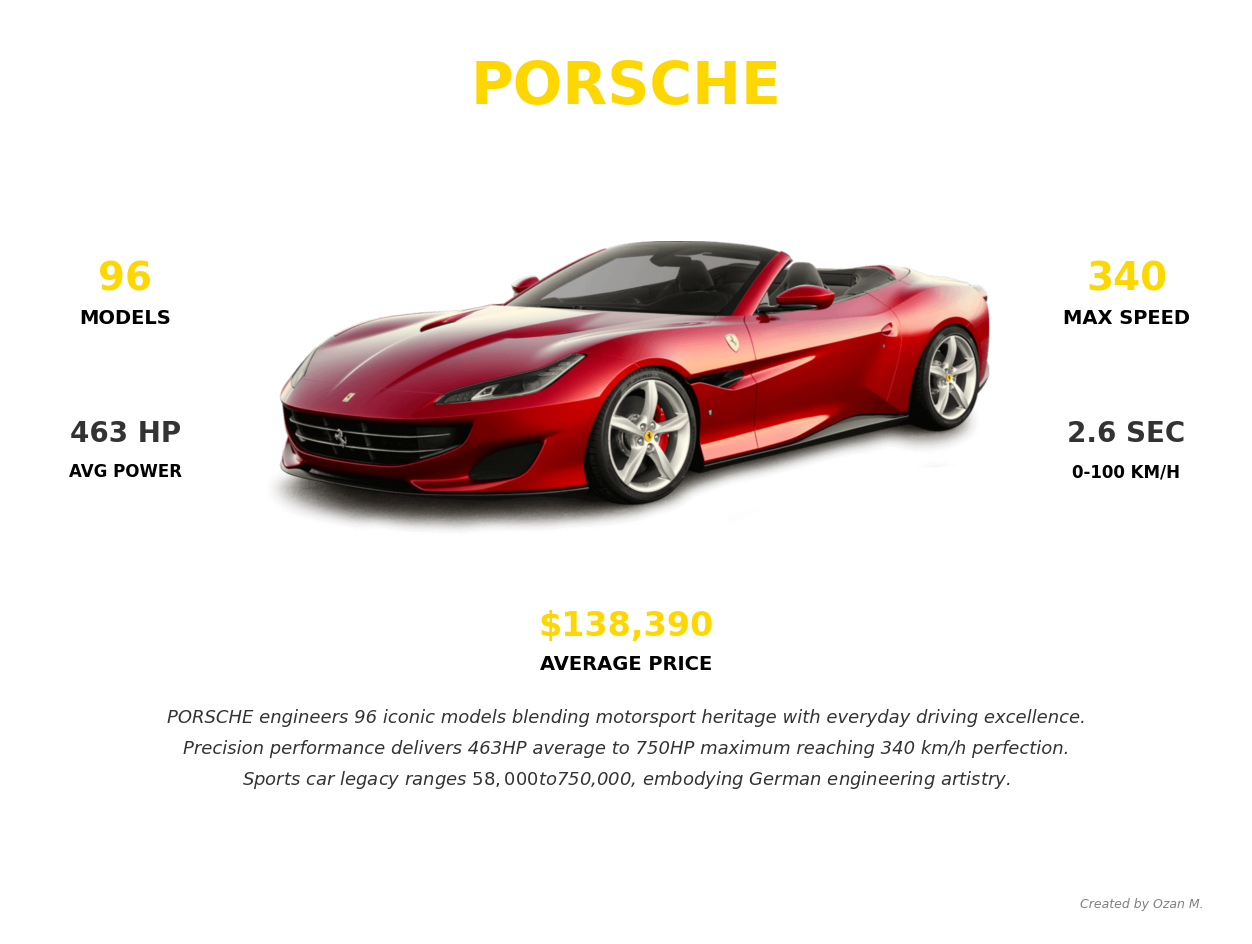

In [13]:
def get_porsche_data(df):
    porsche_data = df[df['Company Names'] == 'PORSCHE']
    
    stats = {
        'total_models': len(porsche_data),
        'avg_power': porsche_data['HorsePower'].mean(),
        'max_power': porsche_data['HorsePower'].max(),
        'avg_price': porsche_data['Cars Prices'].mean(),
        'max_speed': porsche_data['Total Speed'].max(),
        'best_acceleration': porsche_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': porsche_data['CC/Battery Capacity'].mean(),
        'min_price': porsche_data['Cars Prices'].min(),
        'max_price': porsche_data['Cars Prices'].max()
    }
    
    return stats

def create_porsche_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    porsche_stats = get_porsche_data(df)
    
    ax.text(8, 11, 'PORSCHE', ha='center', va='center', fontsize=42, fontweight='bold', color='#FFD700')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/porsche.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='gold', alpha=0.5))
        ax.text(8, 7, 'PORSCHE\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{porsche_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#FFD700')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{porsche_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{porsche_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#FFD700')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{porsche_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${porsche_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#FFD700')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"PORSCHE engineers {porsche_stats['total_models']} iconic models blending motorsport heritage with everyday driving excellence.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Precision performance delivers {porsche_stats['avg_power']:.0f}HP average to {porsche_stats['max_power']:.0f}HP maximum reaching {porsche_stats['max_speed']:.0f} km/h perfection.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Sports car legacy ranges ${porsche_stats['min_price']:,.0f} to ${porsche_stats['max_price']:,.0f}, embodying German engineering artistry.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('porsche_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_porsche_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🚗 7 - MAZDA
</h2>

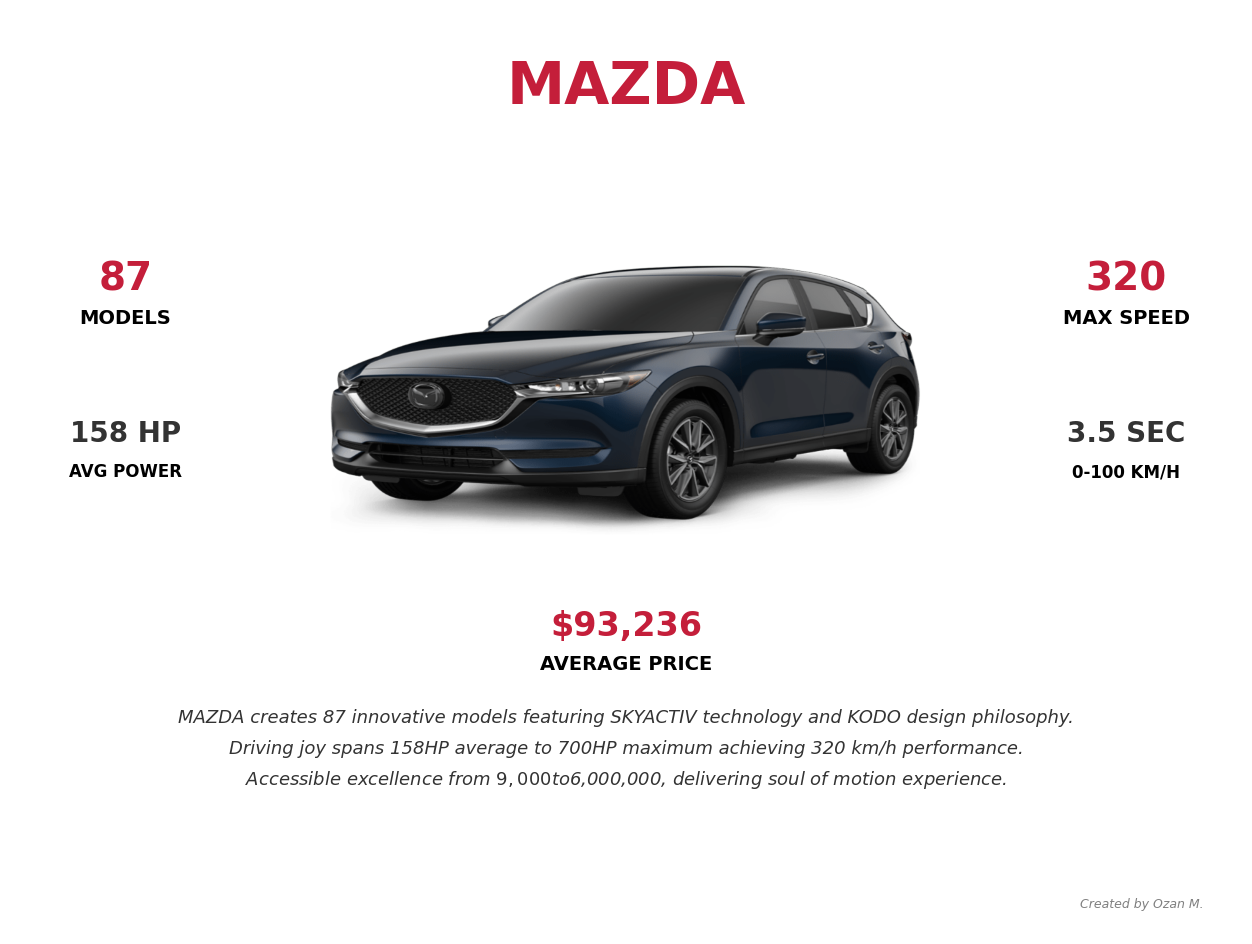

In [14]:
def get_mazda_data(df):
    mazda_data = df[df['Company Names'] == 'MAZDA']
    
    stats = {
        'total_models': len(mazda_data),
        'avg_power': mazda_data['HorsePower'].mean(),
        'max_power': mazda_data['HorsePower'].max(),
        'avg_price': mazda_data['Cars Prices'].mean(),
        'max_speed': mazda_data['Total Speed'].max(),
        'best_acceleration': mazda_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': mazda_data['CC/Battery Capacity'].mean(),
        'min_price': mazda_data['Cars Prices'].min(),
        'max_price': mazda_data['Cars Prices'].max()
    }
    
    return stats

def create_mazda_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    mazda_stats = get_mazda_data(df)
    
    ax.text(8, 11, 'MAZDA', ha='center', va='center', fontsize=42, fontweight='bold', color='#C41E3A')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/mazda.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='lightcoral', alpha=0.5))
        ax.text(8, 7, 'MAZDA\nCAR', ha='center', va='center', fontsize=24, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{mazda_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#C41E3A')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{mazda_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{mazda_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#C41E3A')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{mazda_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${mazda_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#C41E3A')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"MAZDA creates {mazda_stats['total_models']} innovative models featuring SKYACTIV technology and KODO design philosophy.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Driving joy spans {mazda_stats['avg_power']:.0f}HP average to {mazda_stats['max_power']:.0f}HP maximum achieving {mazda_stats['max_speed']:.0f} km/h performance.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Accessible excellence from ${mazda_stats['min_price']:,.0f} to ${mazda_stats['max_price']:,.0f}, delivering soul of motion experience.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('mazda_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_mazda_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🚘 8 - ROLLS-ROYCE
</h2>

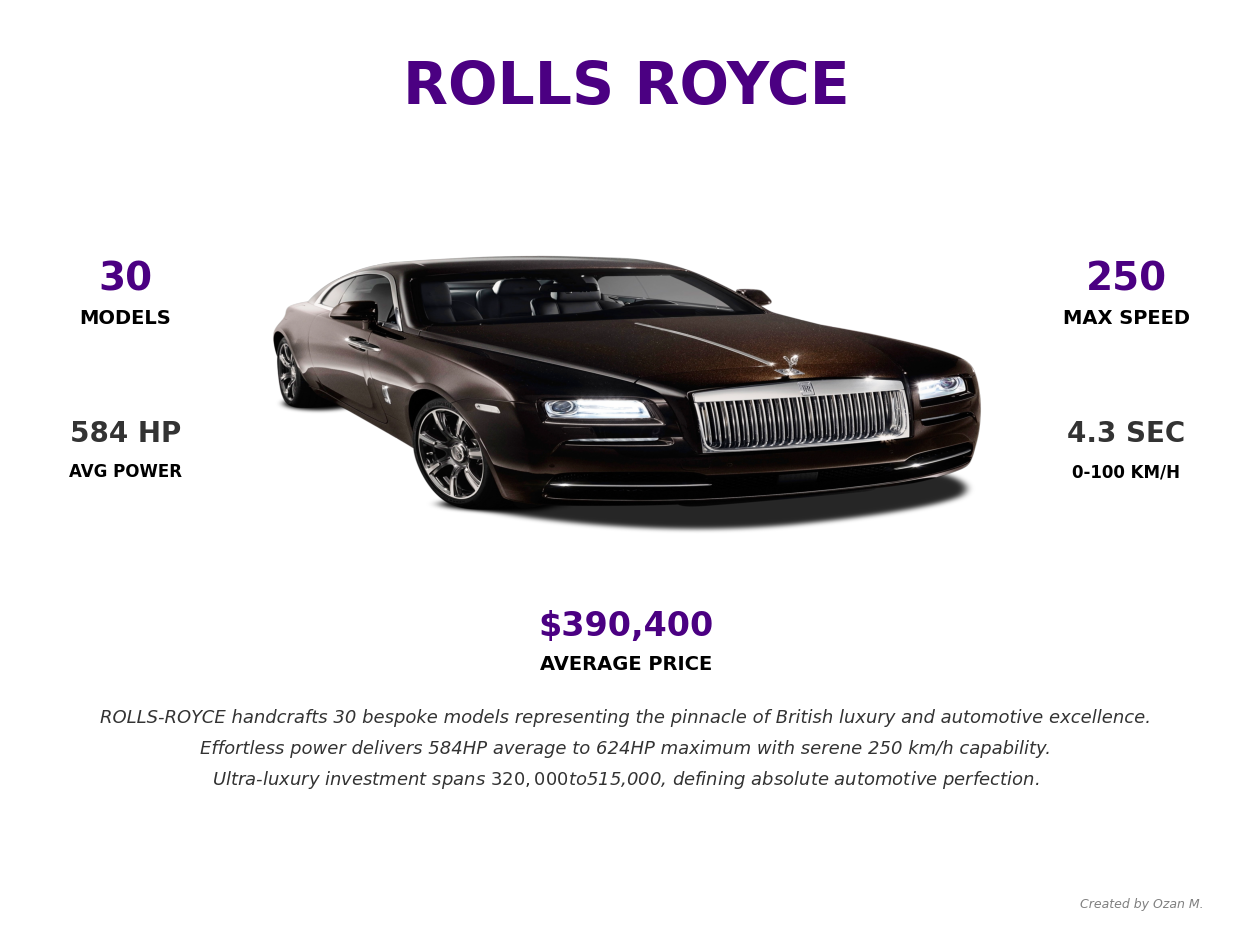

In [15]:
def get_rolls_royce_data(df):
    rolls_data = df[df['Company Names'] == 'ROLLS ROYCE']
    
    stats = {
        'total_models': len(rolls_data),
        'avg_power': rolls_data['HorsePower'].mean(),
        'max_power': rolls_data['HorsePower'].max(),
        'avg_price': rolls_data['Cars Prices'].mean(),
        'max_speed': rolls_data['Total Speed'].max(),
        'best_acceleration': rolls_data['Performance(0 - 100 )KM/H'].min(),
        'avg_cc': rolls_data['CC/Battery Capacity'].mean(),
        'min_price': rolls_data['Cars Prices'].min(),
        'max_price': rolls_data['Cars Prices'].max()
    }
    
    return stats

def create_rolls_royce_card():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    rolls_stats = get_rolls_royce_data(df)
    
    ax.text(8, 11, 'ROLLS ROYCE', ha='center', va='center', fontsize=42, fontweight='bold', color='#4B0082')
    
    try:
        car_img = Image.open('/kaggle/input/car-pictures/rolls.png')
        car_img = car_img.convert("RGBA")
        ax.imshow(car_img, extent=[3, 13, 5, 9], alpha=1.0, zorder=10)
        
    except:
        ax.add_patch(plt.Rectangle((3, 5), 10, 4, facecolor='mediumpurple', alpha=0.5))
        ax.text(8, 7, 'ROLLS ROYCE\nCAR', ha='center', va='center', fontsize=22, fontweight='bold')
    
    ax.text(15.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    ax.text(1.5, 8.5, f"{rolls_stats['total_models']}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#4B0082')
    ax.text(1.5, 8, 'MODELS', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(1.5, 6.5, f"{rolls_stats['avg_power']:.0f} HP", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(1.5, 6, 'AVG POWER', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(14.5, 8.5, f"{rolls_stats['max_speed']:.0f}", ha='center', va='center', 
            fontsize=28, fontweight='bold', color='#4B0082')
    ax.text(14.5, 8, 'MAX SPEED', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(14.5, 6.5, f"{rolls_stats['best_acceleration']:.1f} SEC", ha='center', va='center', 
            fontsize=20, fontweight='bold', color='#333')
    ax.text(14.5, 6, '0-100 KM/H', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(8, 4, f"${rolls_stats['avg_price']:,.0f}", ha='center', va='center', 
            fontsize=24, fontweight='bold', color='#4B0082')
    ax.text(8, 3.5, 'AVERAGE PRICE', ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.text(8, 2.8, f"ROLLS-ROYCE handcrafts {rolls_stats['total_models']} bespoke models representing the pinnacle of British luxury and automotive excellence.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.4, f"Effortless power delivers {rolls_stats['avg_power']:.0f}HP average to {rolls_stats['max_power']:.0f}HP maximum with serene {rolls_stats['max_speed']:.0f} km/h capability.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    ax.text(8, 2.0, f"Ultra-luxury investment spans ${rolls_stats['min_price']:,.0f} to ${rolls_stats['max_price']:,.0f}, defining absolute automotive perfection.", 
            ha='center', va='center', fontsize=13, style='italic', color='#333')
    
    plt.savefig('rolls_royce_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_rolls_royce_card()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
⚡ SPEED COMPARISON
</h2>

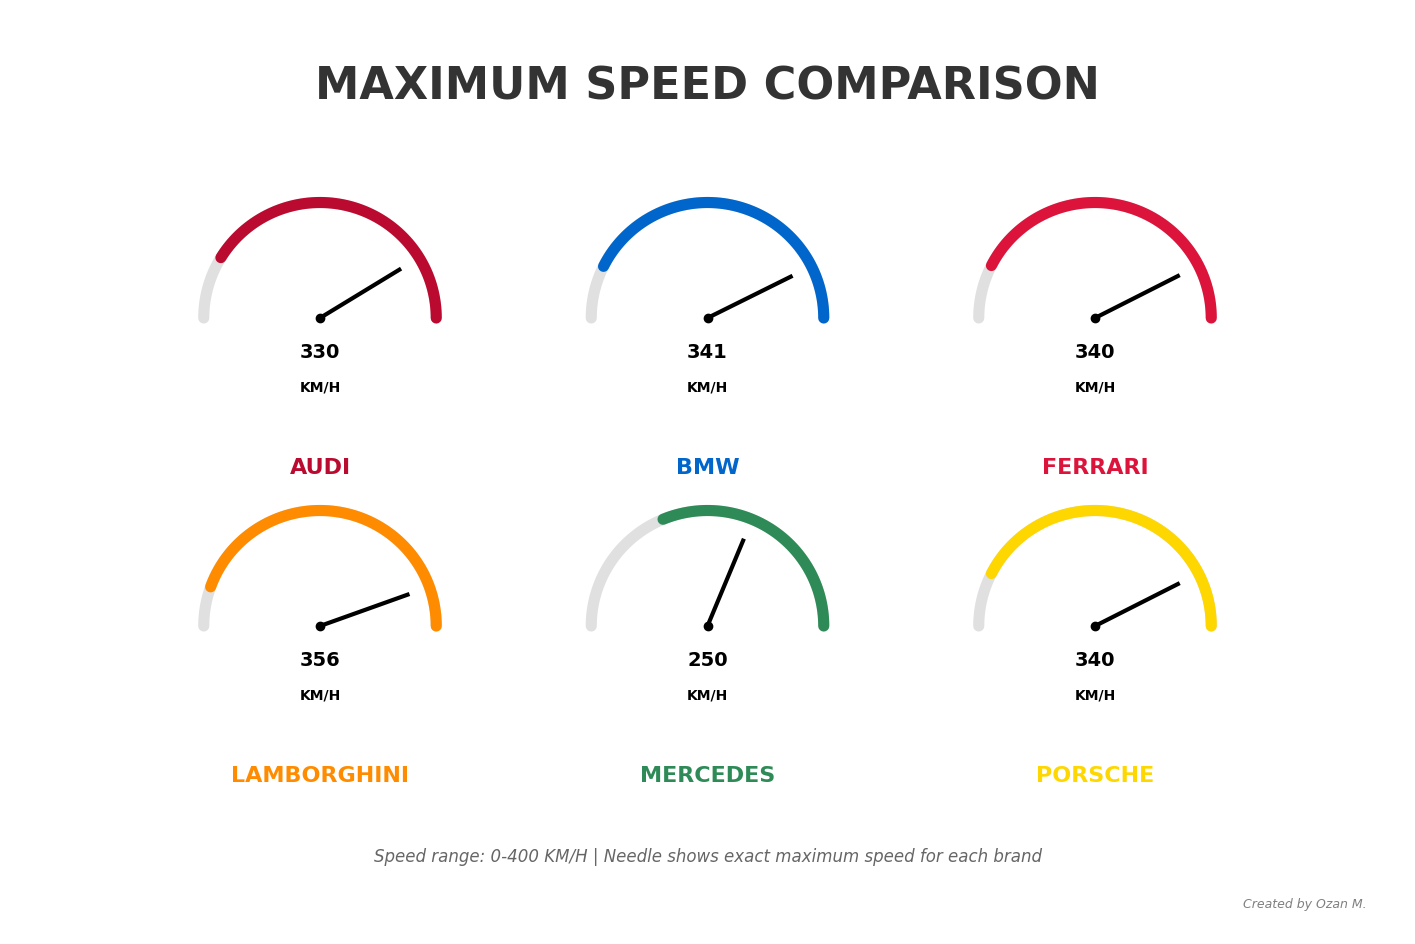

In [16]:
def get_brand_max_speeds(df):
    brands = ['AUDI', 'BMW', 'FERRARI', 'LAMBORGHINI', 'MERCEDES', 'PORSCHE']
    speeds = {}
    
    for brand in brands:
        brand_data = df[df['Company Names'] == brand]
        if len(brand_data) > 0:
            speeds[brand] = brand_data['Total Speed'].max()
        else:
            speeds[brand] = 0
    
    return speeds

def draw_speed_gauge(ax, speed, brand, center_x, center_y, radius, color):
    theta = np.linspace(0, np.pi, 100)
    
    x_bg = center_x + radius * np.cos(theta)
    y_bg = center_y + radius * np.sin(theta)
    ax.plot(x_bg, y_bg, color='#E0E0E0', linewidth=8, solid_capstyle='round')
    
    max_speed = 400
    speed_ratio = min(speed / max_speed, 1.0)
    theta_filled = np.linspace(0, np.pi * speed_ratio, int(100 * speed_ratio))
    
    if len(theta_filled) > 0:
        x_filled = center_x + radius * np.cos(theta_filled)
        y_filled = center_y + radius * np.sin(theta_filled)
        ax.plot(x_filled, y_filled, color=color, linewidth=8, solid_capstyle='round')
    
    needle_angle = np.pi * (1 - speed_ratio)
    needle_x = center_x + (radius * 0.8) * np.cos(needle_angle)
    needle_y = center_y + (radius * 0.8) * np.sin(needle_angle)
    ax.plot([center_x, needle_x], [center_y, needle_y], color='black', linewidth=3)
    ax.plot(center_x, center_y, 'ko', markersize=6)
    
    ax.text(center_x, center_y - radius * 1.3, brand, ha='center', va='center', 
            fontsize=16, fontweight='bold', color=color)
    ax.text(center_x, center_y - radius * 0.3, f'{speed:.0f}', ha='center', va='center', 
            fontsize=14, fontweight='bold')
    ax.text(center_x, center_y - radius * 0.6, 'KM/H', ha='center', va='center', 
            fontsize=10, fontweight='bold')

def create_speed_comparison():
    
    fig, ax = plt.subplots(figsize=(18, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    speeds = get_brand_max_speeds(df)
    
    ax.text(9, 11, 'MAXIMUM SPEED COMPARISON', ha='center', va='center', 
            fontsize=32, fontweight='bold', color='#333333')
    
    brand_colors = {
        'AUDI': '#BB0A30',
        'BMW': '#0066CC', 
        'FERRARI': '#DC143C',
        'LAMBORGHINI': '#FF8C00',
        'MERCEDES': '#2E8B57',
        'PORSCHE': '#FFD700'
    }
    
    positions = [
        (4, 8), (9, 8), (14, 8),
        (4, 4), (9, 4), (14, 4)
    ]
    
    brands = list(speeds.keys())
    
    for i, (brand, (x, y)) in enumerate(zip(brands, positions)):
        speed = speeds[brand]
        color = brand_colors[brand]
        draw_speed_gauge(ax, speed, brand, x, y, 1.5, color)
    
    ax.text(9, 1, 'Speed range: 0-400 KM/H | Needle shows exact maximum speed for each brand', 
            ha='center', va='center', fontsize=12, style='italic', color='#666666')
    
    ax.text(17.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    plt.savefig('speed_comparison_gauges.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_speed_comparison()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
🐎 HORSEPOWER PERFORMANCE
</h2>

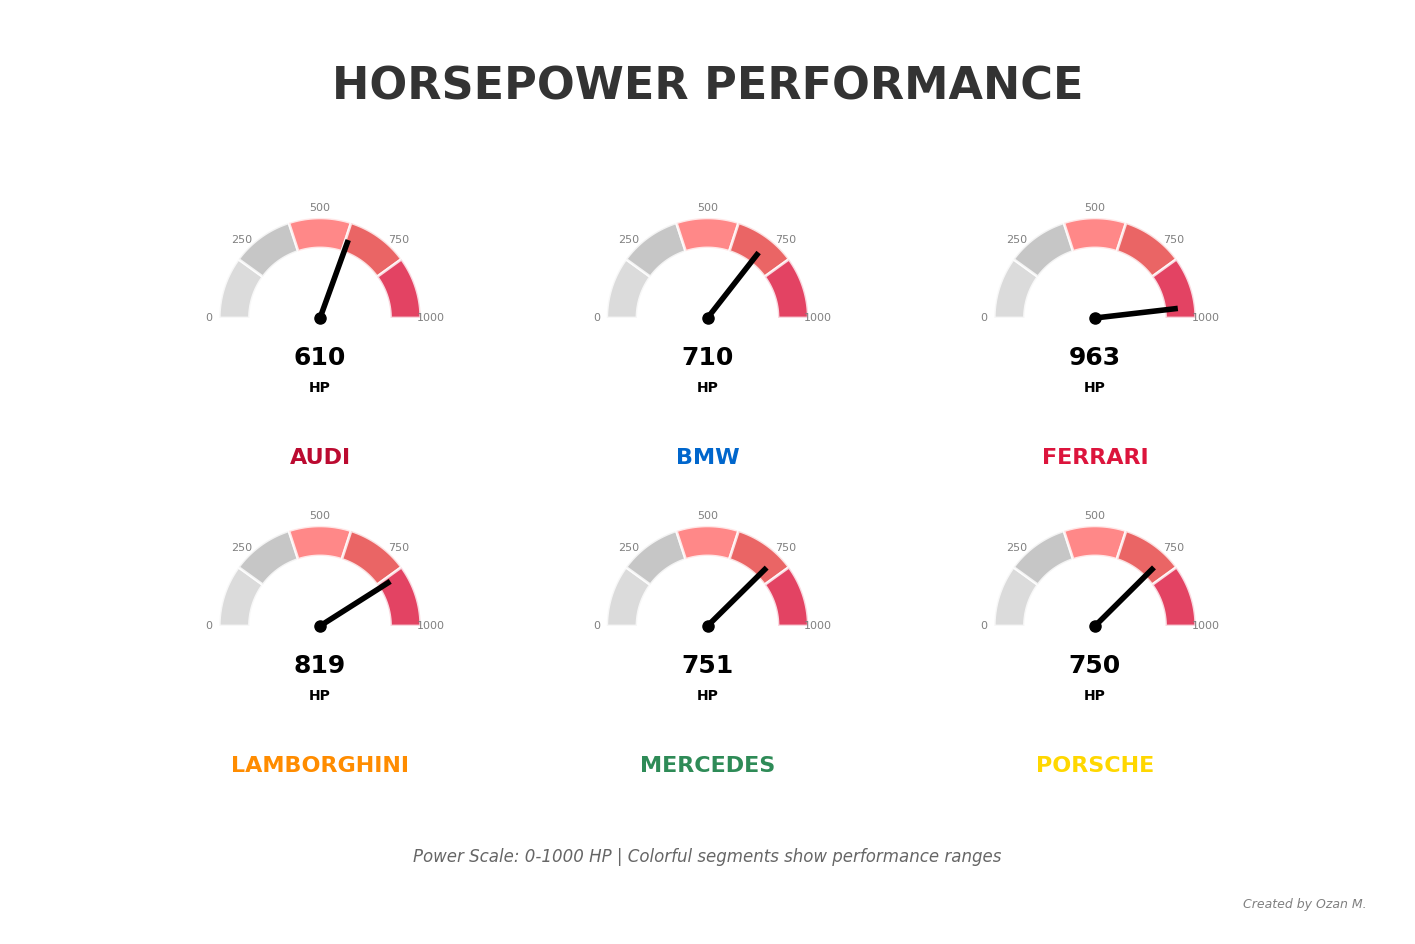

In [17]:
def get_brand_max_horsepower(df):
    brands = ['AUDI', 'BMW', 'FERRARI', 'LAMBORGHINI', 'MERCEDES', 'PORSCHE']
    horsepowers = {}
    
    for brand in brands:
        brand_data = df[df['Company Names'] == brand]
        if len(brand_data) > 0:
            horsepowers[brand] = brand_data['HorsePower'].max()
        else:
            horsepowers[brand] = 0
    
    return horsepowers

def draw_segmented_gauge(ax, horsepower, brand, center_x, center_y, radius, brand_color):
    
    segments = 5
    segment_angle = np.pi / segments
    colors = ['#D3D3D3', '#B8B8B8', '#FF6B6B', '#E53E3E', '#DC143C']
    
    max_hp = 1000
    hp_ratio = min(horsepower / max_hp, 1.0)
    
    for i in range(segments):
        start_angle = np.pi - (i * segment_angle)
        end_angle = np.pi - ((i + 1) * segment_angle)
        
        angles = np.linspace(start_angle, end_angle, 20)
        inner_radius = radius * 0.7
        outer_radius = radius
        
        x_inner = center_x + inner_radius * np.cos(angles)
        y_inner = center_y + inner_radius * np.sin(angles)
        x_outer = center_x + outer_radius * np.cos(angles)
        y_outer = center_y + outer_radius * np.sin(angles)
        
        x_fill = np.concatenate([x_inner, x_outer[::-1], [x_inner[0]]])
        y_fill = np.concatenate([y_inner, y_outer[::-1], [y_inner[0]]])
        
        ax.fill(x_fill, y_fill, color=colors[i], alpha=0.8, edgecolor='white', linewidth=2)
    
    needle_angle = np.pi * (1 - hp_ratio)
    needle_length = radius * 0.8
    needle_x = center_x + needle_length * np.cos(needle_angle)
    needle_y = center_y + needle_length * np.sin(needle_angle)
    
    ax.plot([center_x, needle_x], [center_y, needle_y], color='black', linewidth=4)
    ax.plot(center_x, center_y, 'ko', markersize=8)
    
    ax.text(center_x, center_y - radius * 1.4, brand, ha='center', va='center', 
            fontsize=16, fontweight='bold', color=brand_color)
    
    ax.text(center_x, center_y - radius * 0.4, f'{horsepower:.0f}', ha='center', va='center', 
            fontsize=18, fontweight='bold', color='black')
    ax.text(center_x, center_y - radius * 0.7, 'HP', ha='center', va='center', 
            fontsize=10, fontweight='bold', color='black')
    
    scale_positions = [0, 250, 500, 750, 1000]
    for i, scale_val in enumerate(scale_positions):
        scale_angle = np.pi - (scale_val / max_hp) * np.pi
        scale_x = center_x + (radius * 1.1) * np.cos(scale_angle)
        scale_y = center_y + (radius * 1.1) * np.sin(scale_angle)
        ax.text(scale_x, scale_y, f'{scale_val}', ha='center', va='center', 
                fontsize=8, color='gray')

def create_horsepower_comparison():
    
    fig, ax = plt.subplots(figsize=(18, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    horsepowers = get_brand_max_horsepower(df)
    
    ax.text(9, 11, 'HORSEPOWER PERFORMANCE', ha='center', va='center', 
            fontsize=32, fontweight='bold', color='#333333')
    
    brand_colors = {
        'AUDI': '#BB0A30',
        'BMW': '#0066CC', 
        'FERRARI': '#DC143C',
        'LAMBORGHINI': '#FF8C00',
        'MERCEDES': '#2E8B57',
        'PORSCHE': '#FFD700'
    }
    
    positions = [
        (4, 8), (9, 8), (14, 8),
        (4, 4), (9, 4), (14, 4)
    ]
    
    brands = list(horsepowers.keys())
    
    for i, (brand, (x, y)) in enumerate(zip(brands, positions)):
        horsepower = horsepowers[brand]
        color = brand_colors[brand]
        draw_segmented_gauge(ax, horsepower, brand, x, y, 1.3, color)
    
    ax.text(9, 1, 'Power Scale: 0-1000 HP | Colorful segments show performance ranges', 
            ha='center', va='center', fontsize=12, style='italic', color='#666666')
    
    ax.text(17.5, 0.3, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, 
            style='italic', color='gray')
    
    plt.savefig('horsepower_segmented_gauges.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_horsepower_comparison()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
📊 DETAILED ANALYSIS
</h2>

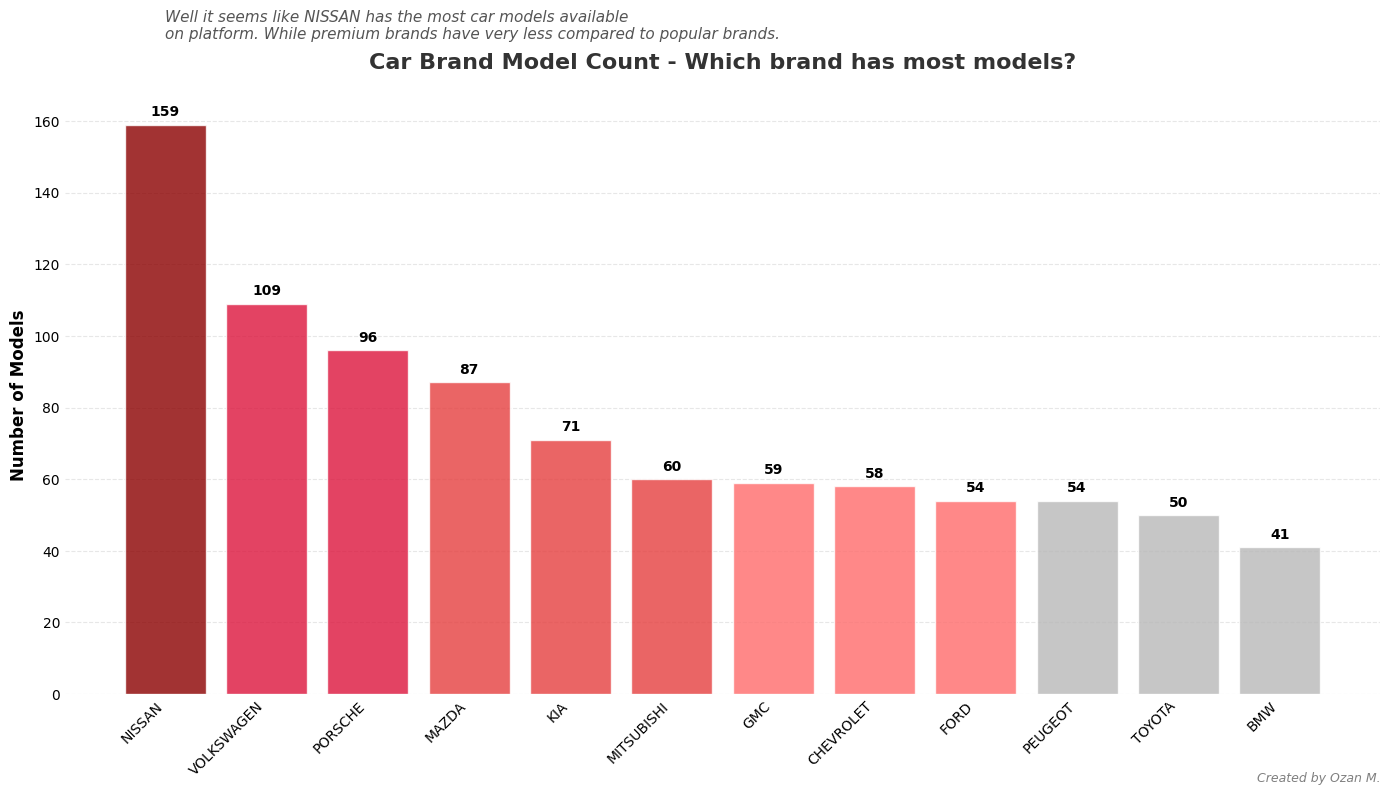

In [18]:
def create_brand_count_bar_chart():
    
    brand_counts = df['Company Names'].value_counts()
    
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    top_brands = brand_counts.head(12)
    
    colors = []
    for i, count in enumerate(top_brands.values):
        if i == 0:  
            colors.append('#8B0000')  
        elif i <= 2:  
            colors.append('#DC143C')  
        elif i <= 5:  
            colors.append('#E53E3E')  
        elif i <= 8:  
            colors.append('#FF6B6B')  
        else:  
            colors.append('#B8B8B8')  
    
    bars = ax.bar(range(len(top_brands)), top_brands.values, color=colors, alpha=0.8, edgecolor='white', linewidth=1)
    
    ax.set_title('Car Brand Model Count - Which brand has most models?', fontsize=16, fontweight='bold', pad=20, color='#333')
    ax.text(0, max(top_brands.values) * 1.15, 'Well it seems like NISSAN has the most car models available\non platform. While premium brands have very less compared to popular brands.', 
            fontsize=11, color='#555', style='italic')
    
    ax.set_xticks(range(len(top_brands)))
    ax.set_xticklabels(top_brands.index, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Number of Models', fontsize=12, fontweight='bold')
    
    for i, (bar, value) in enumerate(zip(bars, top_brands.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(top_brands.values)*0.01,
                f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.figtext(0.99, 0.01, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, style='italic', color='gray')
    
    plt.tight_layout()
    plt.savefig('brand_count_bar_chart.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_brand_count_bar_chart()

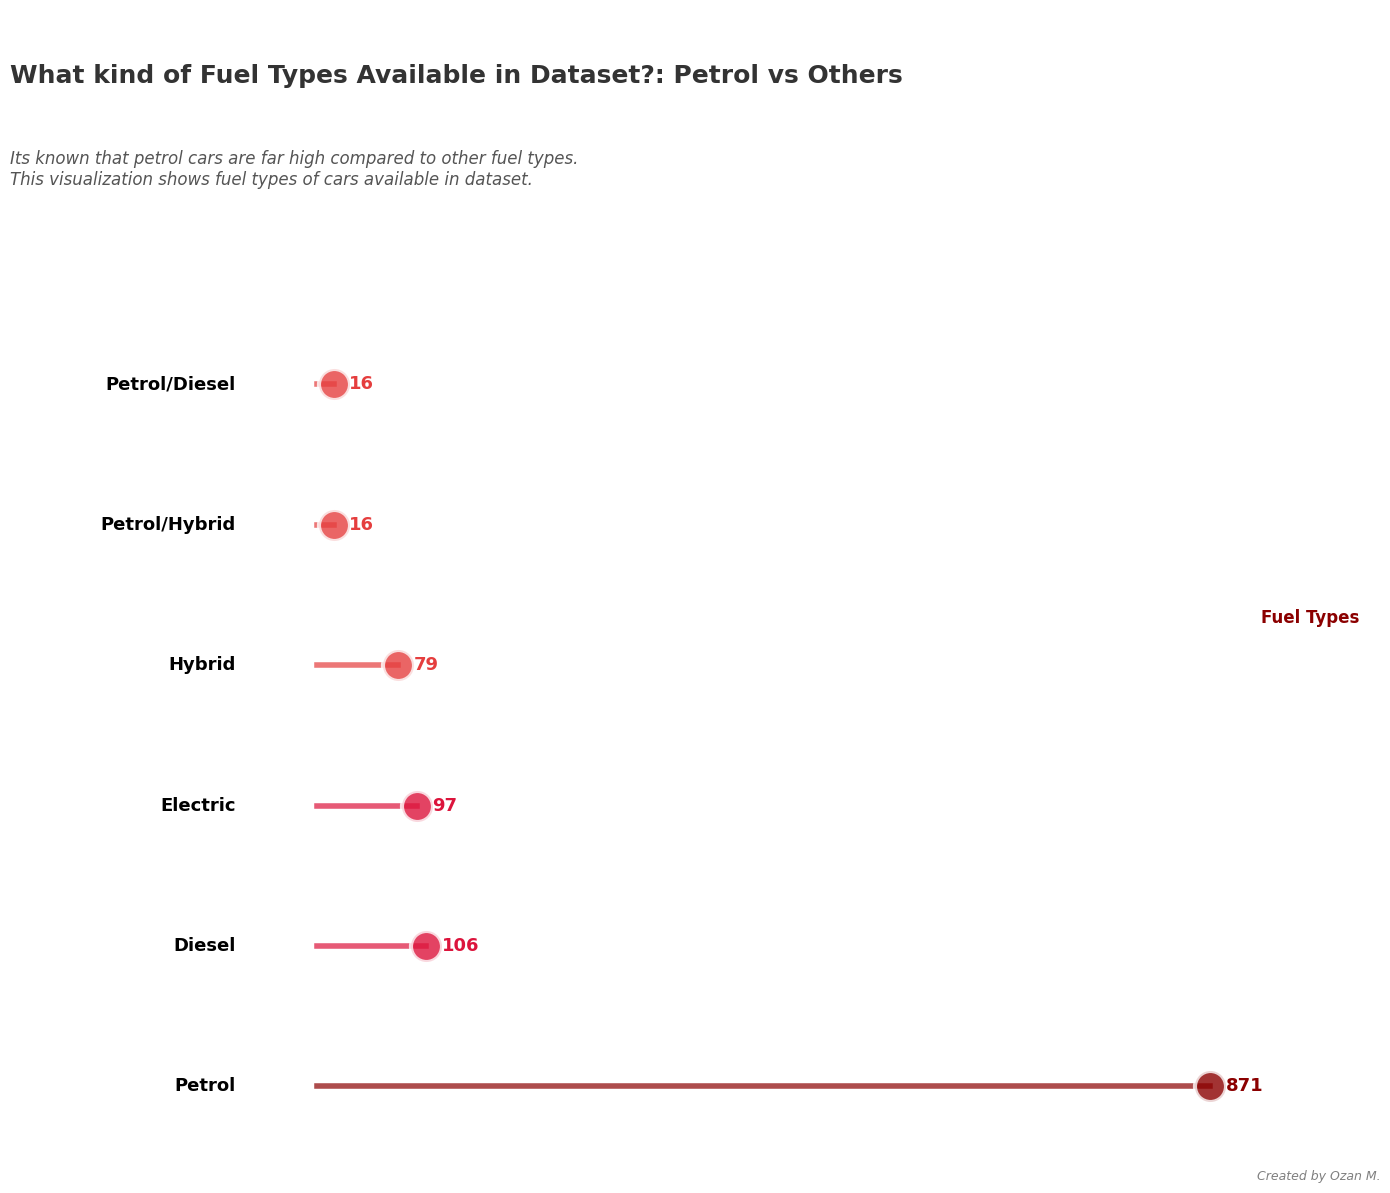

In [19]:
def create_fuel_type_dot_plot():
    
    fuel_counts = df['Fuel Types'].value_counts()
    fuel_counts = fuel_counts[fuel_counts > 5]  
    
    fig, ax = plt.subplots(figsize=(14, 12))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    y_positions = range(len(fuel_counts))
    
    colors = []
    for i, count in enumerate(fuel_counts.values):
        if i == 0:  
            colors.append('#8B0000')
        elif i <= 2:
            colors.append('#DC143C')
        elif i <= 5:
            colors.append('#E53E3E')
        elif i <= 8:
            colors.append('#FF6B6B')
        else:
            colors.append('#B8B8B8')
    
    ax.text(-300, len(fuel_counts)*1.5 + 1.8, 'What kind of Fuel Types Available in Dataset?: Petrol vs Others', 
            ha='left', va='center', fontsize=18, fontweight='bold', color='#333')
    ax.text(-300, len(fuel_counts)*1.5 + 0.8, 
            'Its known that petrol cars are far high compared to other fuel types.\nThis visualization shows fuel types of cars available in dataset.',
            ha='left', va='center', fontsize=12, color='#555', style='italic')
    
    for i, (fuel_type, count) in enumerate(fuel_counts.items()):
        # Çizgi 0'dan count'a kadar
        ax.plot([0, count], [i*1.5, i*1.5], color=colors[i], linewidth=4, alpha=0.7, zorder=2)
        
        # Dot çizginin SONUNDA (count pozisyonunda)
        ax.scatter(count, i*1.5, s=500, color=colors[i], alpha=0.8, edgecolor='white', linewidth=3, zorder=3)
        
        # Fuel type label sol tarafta
        ax.text(-80, i*1.5, fuel_type.title(), ha='right', va='center', fontsize=13, fontweight='bold')
        
        # Count value dot'un yanında
        ax.text(count + 15, i*1.5, str(count), ha='left', va='center', fontsize=13, fontweight='bold', color=colors[i])
    
    ax.set_xlim(-300, max(fuel_counts.values) + 150)
    ax.set_ylim(-1, len(fuel_counts)*1.5 + 2.5)
    
    ax.text(max(fuel_counts.values) + 50, len(fuel_counts) - 1, 'Fuel Types', 
            ha='left', va='center', fontsize=12, fontweight='bold', color='#8B0000')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.figtext(0.99, 0.01, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, style='italic', color='gray')
    
    plt.tight_layout()
    plt.savefig('fuel_type_dot_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_fuel_type_dot_plot()

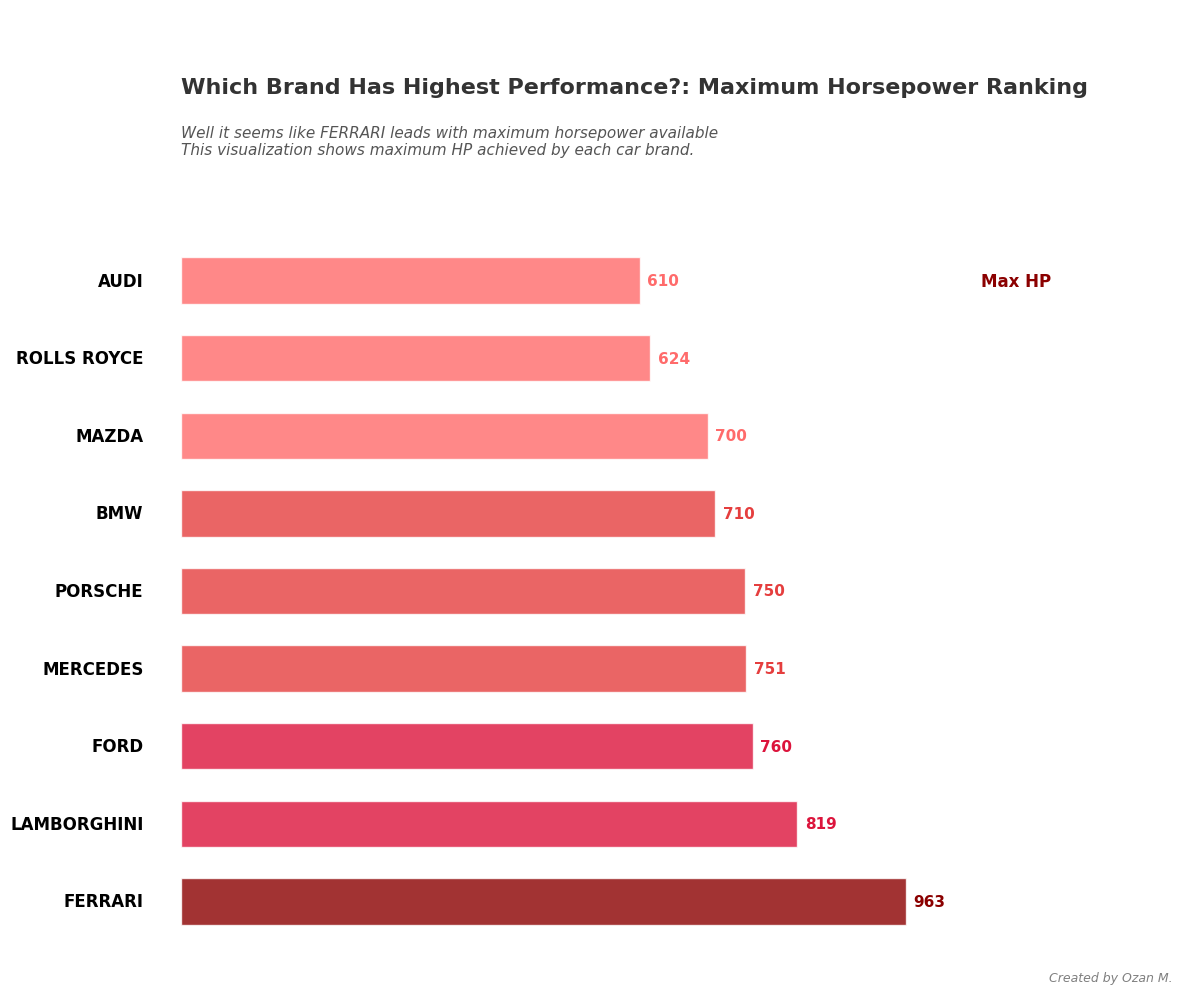

In [20]:
def create_top_performance_horizontal_bar():
    
    brands = ['AUDI', 'BMW', 'FERRARI', 'LAMBORGHINI', 'MERCEDES', 'PORSCHE', 'ROLLS ROYCE', 'MAZDA', 'FORD']
    brand_performance = {}
    
    for brand in brands:
        brand_data = df[df['Company Names'] == brand]
        if len(brand_data) > 0:
            max_hp = brand_data['HorsePower'].max()
            brand_performance[brand] = max_hp
        else:
            brand_performance[brand] = 0
    
    sorted_brands = sorted(brand_performance.items(), key=lambda x: x[1], reverse=True)
    top_brands = sorted_brands[:10]  # Top 10
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    brand_names = [item[0] for item in top_brands]
    hp_values = [item[1] for item in top_brands]
    
    colors = []
    for i, hp in enumerate(hp_values):
        if i == 0:  # En yüksek
            colors.append('#8B0000')
        elif i <= 2:
            colors.append('#DC143C')
        elif i <= 5:
            colors.append('#E53E3E')
        elif i <= 8:
            colors.append('#FF6B6B')
        else:
            colors.append('#B8B8B8')
    
    y_positions = range(len(top_brands))
    
    ax.text(0, len(top_brands) + 1.5, 'Which Brand Has Highest Performance?: Maximum Horsepower Ranking', 
            ha='left', va='center', fontsize=16, fontweight='bold', color='#333')
    ax.text(0, len(top_brands) + 0.8, 
            'Well it seems like FERRARI leads with maximum horsepower available\nThis visualization shows maximum HP achieved by each car brand.',
            ha='left', va='center', fontsize=11, color='#555', style='italic')
    
    bars = ax.barh(y_positions, hp_values, color=colors, alpha=0.8, height=0.6, edgecolor='white', linewidth=1)
    
    for i, (brand, hp) in enumerate(top_brands):
        ax.text(-50, i, brand, ha='right', va='center', fontsize=12, fontweight='bold')
        ax.text(hp + 10, i, f'{hp:.0f}', ha='left', va='center', fontsize=11, fontweight='bold', color=colors[i])
    
    ax.text(max(hp_values) + 100, len(top_brands) - 1, 'Max HP', 
            ha='left', va='center', fontsize=12, fontweight='bold', color='#8B0000')
    
    ax.set_xlim(-200, max(hp_values) + 200)
    ax.set_ylim(-1, len(top_brands) + 2.5)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.figtext(0.99, 0.01, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, style='italic', color='gray')
    
    plt.tight_layout()
    plt.savefig('top_performance_horizontal_bar.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

create_top_performance_horizontal_bar()

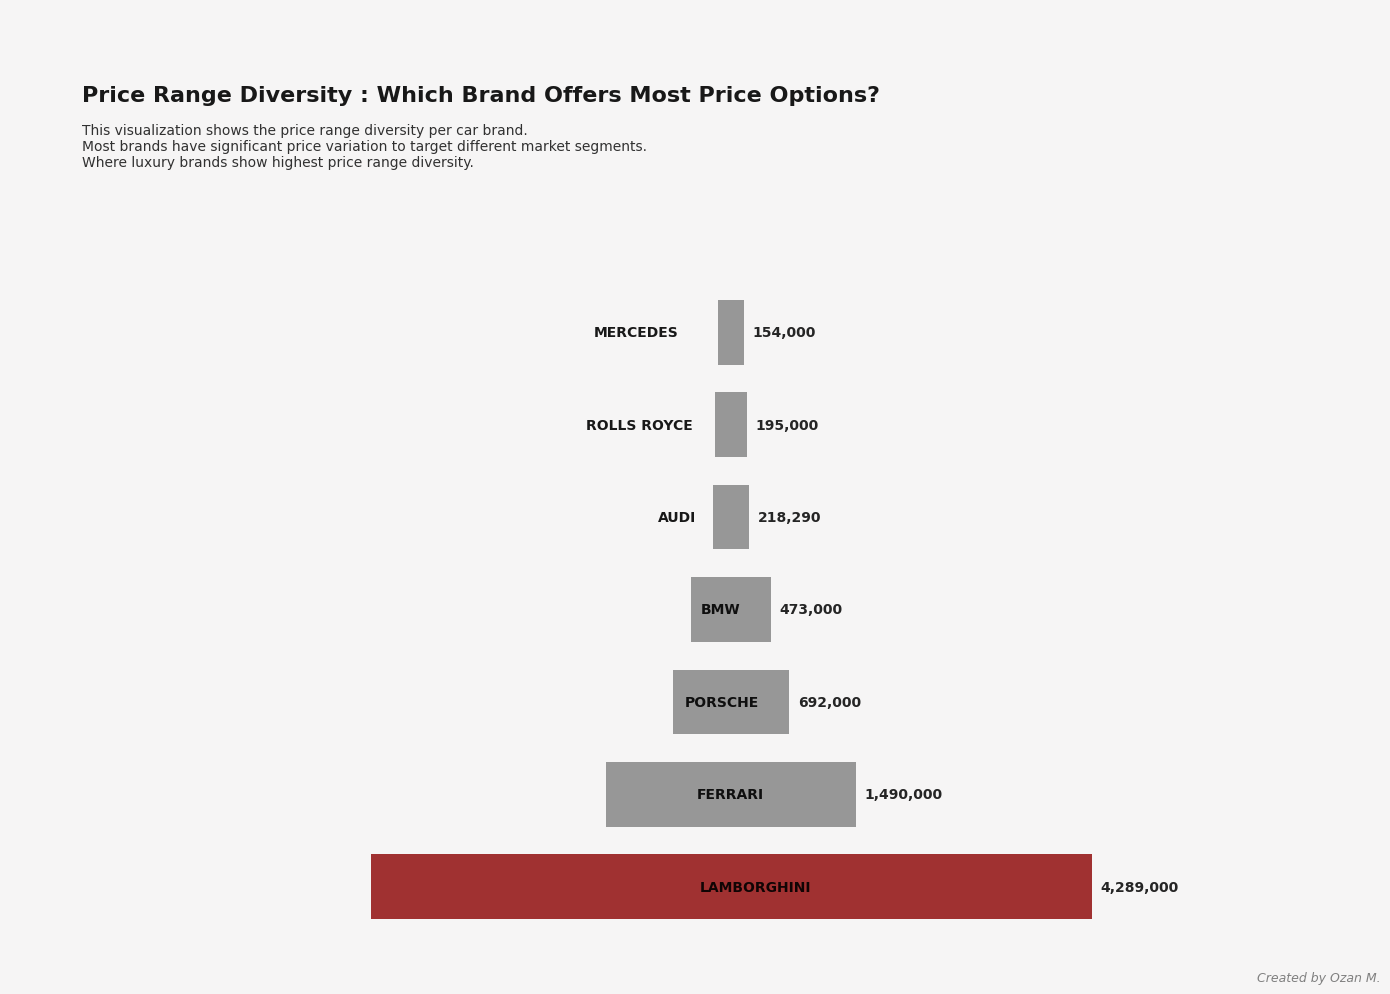

In [21]:
def create_price_range_mirror_bar():
    
    brands = ['AUDI', 'BMW', 'FERRARI', 'LAMBORGHINI', 'MERCEDES', 'PORSCHE', 'ROLLS ROYCE']
    price_ranges = {}
    
    for brand in brands:
        brand_data = df[df['Company Names'] == brand]
        if len(brand_data) > 0:
            price_range = brand_data['Cars Prices'].max() - brand_data['Cars Prices'].min()
            price_ranges[brand] = price_range
        else:
            price_ranges[brand] = 0
    
    sorted_prices = sorted(price_ranges.items(), key=lambda x: x[1], reverse=True)
    
    fig, ax = plt.subplots(figsize=(14, 10))
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')
    
    brand_names = [item[0] for item in sorted_prices]
    price_values = [item[1] for item in sorted_prices]
    
    colors = ['#8B0000' if i == 0 else 'grey' for i in range(len(brand_names))]
    y_positions = range(len(brand_names))
    
    ax.barh(y_positions, price_values, height=0.7, color=colors, alpha=0.8)
    ax.barh(y_positions, [-x for x in price_values], height=0.7, color=colors, alpha=0.8)
    

    for i, (brand, price) in enumerate(sorted_prices):
        ax.text(price + 100000, i, f'{price:,.0f}', fontsize=10, fontweight='bold',
                color='black', alpha=0.85, ha='left', va='center')
    
   
    cm_to_data = max(price_values) / 10 
  
    for i, (brand, price) in enumerate(sorted_prices):
        if brand == 'LAMBORGHINI':
           ax.text(price - 4000000, i, f'{brand}', fontsize=10, fontweight='bold',
                   color='black', alpha=0.9, ha='center', va='center')  # 3 cm sola
        elif brand == 'FERRARI':
            ax.text(price - 1500000, i, f'{brand}', fontsize=10, fontweight='bold',
                   color='black', alpha=0.9, ha='center', va='center')  # 1 cm sola
        elif brand == 'PORSCHE':
            ax.text(price - 800000, i, f'{brand}', fontsize=10, fontweight='bold',
                   color='black', alpha=0.9, ha='center', va='center')  # 0.5 cm sola
        elif brand == 'BMW':
            ax.text(price - 600000, i, f'{brand}', fontsize=10, fontweight='bold',
                   color='black', alpha=0.9, ha='center', va='center')  # çok az sola
        elif brand == 'AUDI':
            ax.text(price - 2*cm_to_data, i, f'{brand}', fontsize=10, fontweight='bold',
                    color='black', alpha=0.9, ha='center', va='center')
        elif brand == 'ROLLS ROYCE':
            ax.text(price - 3*cm_to_data, i, f'{brand}', fontsize=10, fontweight='bold',
                    color='black', alpha=0.9, ha='center', va='center')
        elif brand == 'MERCEDES':
            ax.text(price - 3*cm_to_data, i, f'{brand}', fontsize=10, fontweight='bold',
                    color='black', alpha=0.9, ha='center', va='center')
    
    ax.text(-max(price_values)*1.8, len(brand_names) + 1.5, 
            'Price Range Diversity : Which Brand Offers Most Price Options?',
            fontsize=16, fontweight='bold', color='black', alpha=0.9, ha='left')
    ax.text(-max(price_values)*1.8, len(brand_names) + 0.8, 
            'This visualization shows the price range diversity per car brand.\nMost brands have significant price variation to target different market segments.\nWhere luxury brands show highest price range diversity.',
            fontsize=10, color='black', alpha=0.8, ha='left')
    
    ax.set_xlim([-max(price_values)*2, max(price_values)*1.8])
    ax.set_ylim([-1, len(brand_names) + 2.5])
    
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.figtext(0.99, 0.01, 'Created by Ozan M.', ha='right', va='bottom', fontsize=9, style='italic', color='gray')
    
    plt.tight_layout()
    plt.savefig('price_range_mirror_bar.png', dpi=300, bbox_inches='tight', facecolor='#f6f5f5')
    plt.show()

create_price_range_mirror_bar()

<h2 style="background-color:#0a0a23; color:#ff2b2b; padding:10px; border-radius:6px; font-family:sans-serif;">
✅ That’s all for now. See you in the next sessions. Thank you for your support.
</h2>